## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Ли Алиса И. |
|---------|-------------|
| Группа  | М8О-308б-18 |

Для начала, скачаем датасет MNIST. Используйте `wget` или `curl`, либо скачайте вручную [по ссылке](https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz).

In [ ]:
#!wget https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz


Теперь загружаем датасет:

In [129]:
import pandas as pd

df = pd.read_csv('/content/sample_data/mnist_train.csv',nrows=25000)
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24997,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24998,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
import numpy as np
import matplotlib.pyplot as plt 

f = df.dropna()
labels = df['label']
data = df.drop('label', 1)
data = data.astype(np.float64)
data = data / 1000
data

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147,0.252,0.042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Смотрим на то, какие данные получились:

In [ ]:
data.dtypes

1x1      float64
1x2      float64
1x3      float64
1x4      float64
1x5      float64
          ...   
28x24    float64
28x25    float64
28x26    float64
28x27    float64
28x28    float64
Length: 784, dtype: object

Используйте Scikit Learn для разбиения данных на обучающую и тестовую выборку

In [93]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=0)

X_train.shape



(18057, 784)

Реализуем классы Linear, Softmax и CrossEntropyLoss

In [94]:
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)
        
    def forward(self, x):
        self.x=x
        return np.dot(x, self.W.T) + self.b
    
    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx
    
    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db
      
class Softmax:
    def forward(self,z):
        self.z = z
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z
    def backward(self,dp):
        p = self.forward(self.z)
        pdp = p * dp
        return pdp - p * pdp.sum(axis=1, keepdims=True)
    
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean()
    def backward(self,loss):
        dlog_softmax = np.zeros_like(self.p)
        dlog_softmax[np.arange(len(self.y)), self.y] -= 1.0/len(self.y)
        return dlog_softmax / self.p
class Tanh:
    def forward(self,x):
        y = np.tanh(x)
        self.y = y
        return y
    def backward(self,dy):
        return (1.0-self.y**2)*dy
class Pow:
    def forward(self, x):
        y = np.power(x, 3)
        self.y = y
        self.x = x
        return y
    def backward(self, dy):
      return 0.5 * np.power(self.x, 2) * dy
class Sin:
    def forward(self, x):
        y = np.sin(x)
        self.x = x
        return y
    def backward(self, dy):
      return np.cos(self.x) * dy
class Exp:
    def forward(self, x):
        y = np.exp(x)
        self.y = y
        return y
    def backward(self, dy):
      return self.y * dy


Добавим класс, который объединит все классы в один

In [161]:
class Net:
    def __init__(self):
        self.layers = []
    
    def add(self,l):
        self.layers.append(l)
        
    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x
    
    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z
    
    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)

      
    def fit(self, train_x, train_labels, loss = CrossEntropyLoss(), epoch = 5, batch_size=5, lr=0.05):
        for i in range(epoch):
          for i in range(0,len(train_x),batch_size):
            xb = train_x[i:i+batch_size]
            yb = train_labels[i:i+batch_size]

            p = self.forward(xb)
            l = loss.forward(p,yb)
            dp = loss.backward(l)
            dx = self.backward(dp)
            self.update(lr)

    def fit_and_plot(self, train_x, train_labels, loss = CrossEntropyLoss(), epoch = 5, batch_size=5, lr=0.05):
        x = []
        y = [] 
        count = 0
        for j in range(epoch):
          for i in range(0,len(train_x),batch_size):
            xb = train_x[i:i+batch_size]
            yb = train_labels[i:i+batch_size]

            p = self.forward(xb)
            l = loss.forward(p,yb)
            dp = loss.backward(l)
            dx = self.backward(dp)
            self.update(lr)
            if i % (batch_size * 20) == 0:
              count += 1
              x.append(count)
              y.append(self.score(train_x, train_labels))
            
        fig, ax = plt.subplots(1, 1) 
        plt.plot(x, y)
        plt.show() 

      
    
    def score(self, test_x, test_y):
      p = self.forward(test_x)
      pred = np.argmax(p, axis = 1)
      acc = (pred == test_y).mean()
      return acc

    def confusion_matrix(self, test_x, test_y, out):
      p = self.forward(test_x)
      pred = np.argmax(p, axis = 1)
      res = np.zeros((out, out))
      y = test_y.to_numpy()
      for i in range(len(pred)):
        res[pred[i], y[i]] += 1
      return res




Обучим нашу нейросеть и проверим точность предсказаний

In [97]:
net_1_l = Net()
net_1_l.add(Linear(784,10))
net_1_l.add(Softmax())


net_1_l.fit(X_train, y_train, epoch=10)
net_1_l.score(X_test, y_test)

0.9077919920252534

Однойслойный персептрон всего за пять эпох достиг точности в 90%
Добавим промежуточных слоев

In [ ]:
net_2_l = Net()
net_2_l.add(Linear(784, 15))
net_2_l.add(Tanh())
net_2_l.add(Linear(15, 10))
net_2_l.add(Softmax())

net_2_l.fit(X_train, y_train)
net_2_l.score(X_test, y_test)

0.92464

Добавление слоя гиперболического тангенса повысило точность предсказаний до 92%. Выведем также матрицу неточностей

In [ ]:
net_2_l.confusion_matrix(X_test, y_test, out = 10)

array([[570.,   0.,   7.,   4.,   1.,   7.,   5.,   0.,   3.,   7.],
       [  0., 660.,   7.,   1.,   1.,   2.,   4.,   1.,  16.,   0.],
       [  2.,   4., 547.,  21.,   0.,   2.,   4.,   4.,   6.,   0.],
       [  1.,   1.,   7., 568.,   0.,  11.,   0.,   0.,   8.,   6.],
       [  1.,   0.,  10.,   0., 584.,   8.,   1.,   3.,   7.,  14.],
       [  3.,   8.,   1.,  37.,   0., 522.,  10.,   0.,  27.,   5.],
       [  7.,   1.,   4.,   1.,   8.,   5., 589.,   0.,   9.,   0.],
       [  1.,   0.,   6.,  11.,   0.,   2.,   0., 614.,   3.,  11.],
       [  5.,   4.,  10.,  11.,   0.,   7.,   3.,   0., 519.,   1.],
       [  1.,   2.,   3.,  10.,  28.,   9.,   0.,  16.,  14., 606.]])

Как видно из таблицы хуже всего классифицируются цифры 5 и 8. Добавим слой возведения в куб

In [ ]:
net_3_l = Net()
net_3_l.add(Linear(784, 20))
net_3_l.add(Tanh())
net_3_l.add(Pow())
net_3_l.add(Linear(20, 10))
net_3_l.add(Softmax())

net_3_l.fit(X_train, y_train)
net_3_l.score(X_test, y_test)

0.89616

Добавлен слой возведения в куб, что умешьшило точность до 89. Заменим третий слой на слой синуса

In [ ]:
net_3_l = Net()
net_3_l.add(Linear(784, 20))
net_3_l.add(Tanh())
net_3_l.add(Sin())
net_3_l.add(Linear(20, 10))
net_3_l.add(Softmax())

net_3_l.fit(X_train, y_train)
net_3_l.score(X_test, y_test)

0.91952

Слой синуса почти не изменил точность двух слоев. Заменим второй слой на слой экспоненты

In [ ]:
net_3_l = Net()
net_3_l.add(Linear(784, 20))
net_3_l.add(Exp())
net_3_l.add(Sin())
net_3_l.add(Linear(20, 10))
net_3_l.add(Softmax())

net_3_l.fit(X_train, y_train)
net_3_l.score(X_test, y_test)

0.91376

Изменение гипербоического тангенса на экспоненту почти не изменило точность. Протестируем наш персептрон на датасете fashion-mnist

In [139]:
df = pd.read_csv('/content/sample_data/fashion-mnist_train.csv', nrows=35000)
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211.0,220.0,214.0,74.0,0.0,255.0,222.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,12.0,0.0,0.0,40.0,134.0,162.0,191.0,214.0,163.0,146.0,165.0,79.0,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171.0,249.0,207.0,197.0,202.0,45.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,21.0,25.0,69.0,52.0,45.0,74.0,39.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230.0,237.0,229.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,116.0,112.0,136.0,147.0,144.0,121.0,102.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22237,0,0,0,0,0,0,0,0,0,0,17,105,45,0,0,0,0,34,144,66,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,115,217,242,216,...,235.0,237.0,223.0,231.0,216.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,64.0,192.0,169.0,176.0,172.0,170.0,172.0,173.0,172.0,171.0,172.0,175.0,188.0,182.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
22238,2,0,0,0,0,0,2,0,0,0,0,67,148,89,66,62,69,89,166,78,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,72,145,196,209,...,185.0,149.0,58.0,0.0,0.0,0.0,190.0,235.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,218.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0,221.0,99.0,0.0,0.0,0.0
22239,0,0,0,0,0,2,0,0,0,0,0,10,145,73,0,5,74,96,61,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,23,112,173,201,...,211.0,183.0,197.0,73.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22240,3,0,0,0,0,0,0,0,0,0,58,96,80,192,184,123,226,180,131,72,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,3,0,32,174,174,...,218.0,172.0,215.0,180.0,177.0,180.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,119.0,30.0,73.0,140.0,137.0,106.0,0.0,147.0,168.0,56.0,118.0,131.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
import numpy as np

f = df.dropna()
labels = df['label']
data = df.drop('label', 1)
data = data.astype(np.float64)
data = data / 1000
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.005,0.0,0.000,0.000,0.105,0.092,0.101,0.107,0.100,0.132,0.000,0.000,0.002,0.004,0.000,0.001,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.150,0.227,...,0.211,0.220,0.214,0.074,0.000,0.255,0.222,0.128,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.044,0.012,0.000,0.000,0.040,0.134,0.162,0.191,0.214,0.163,0.146,0.165,0.079,0.000,0.000,0.000,0.03,0.043,0.000,0.000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.001,0.002,0.000,0.0,0.000,0.0,0.000,0.114,0.183,0.112,0.055,0.023,0.072,0.102,0.165,0.160,0.028,0.000,0.000,0.000,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.001,0.0,0.000,0.024,0.188,0.163,0.093,0.136,...,0.171,0.249,0.207,0.197,0.202,0.045,0.000,0.003,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.001,0.000,0.000,0.000,0.022,0.021,0.025,0.069,0.052,0.045,0.074,0.039,0.003,0.000,0.000,0.00,0.000,0.001,0.000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.046,0.000,0.021,0.068,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.025,0.187,0.189,0.000,...,0.230,0.237,0.229,0.000,0.000,0.001,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.068,0.116,0.112,0.136,0.147,0.144,0.121,0.102,0.063,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22237,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.017,0.105,0.045,0.000,0.000,0.000,0.000,0.034,0.144,0.066,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,0.0,0.000,0.115,0.217,0.242,0.216,0.252,...,0.235,0.237,0.223,0.231,0.216,0.000,0.000,0.002,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.002,0.000,0.064,0.192,0.169,0.176,0.172,0.170,0.172,0.173,0.172,0.171,0.172,0.175,0.188,0.182,0.00,0.000,0.002,0.000,0.0,0.0,0.0
22238,0.0,0.0,0.0,0.000,0.000,0.002,0.0,0.000,0.0,0.000,0.067,0.148,0.089,0.066,0.062,0.069,0.089,0.166,0.078,0.000,0.000,0.000,0.000,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.001,0.0,0.000,0.072,0.145,0.196,0.209,0.195,...,0.185,0.149,0.058,0.000,0.000,0.000,0.190,0.235,0.123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.218,0.099,0.000,0.000,0.000,0.000,0.000,0.000,0.000

In [141]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

X_train.shape

(17793, 784)

In [156]:
net_3_l = Net()
net_3_l.add(Linear(784, 20))
net_3_l.add(Tanh())
net_3_l.add(Sin())
net_3_l.add(Linear(20, 10))
net_3_l.add(Softmax())

net_3_l.fit(X_train, y_train, epoch=15)
net_3_l.score(X_test, y_test)

0.8565969880872106

Fashion-mnist классифицируется хуже из-за сложности датасета, однако требуемая точность достигнута. Выведем также матрицу неточностей и график точности.

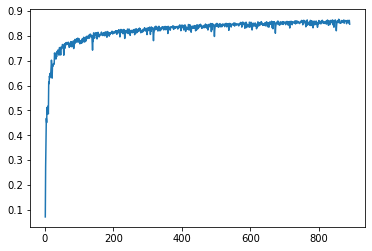

[[408.   1.   5.  43.   3.   0.  85.   0.   3.   0.]
 [  0. 445.   0.   3.   1.   0.   1.   0.   1.   0.]
 [ 10.   4. 345.   6.  33.   0.  70.   0.  11.   0.]
 [ 12.  11.   5. 377.  10.   0.   8.   0.   3.   0.]
 [  1.   2.  45.  14. 322.   0.  30.   0.   1.   0.]
 [  0.   0.   0.   0.   1. 385.   0.   5.   2.   5.]
 [ 23.   3.  25.  15.  40.   0. 229.   0.   8.   0.]
 [  0.   0.   0.   0.   0.  32.   0. 434.   1.  25.]
 [  3.   0.   3.   1.   2.   3.  13.   4. 446.   2.]
 [  0.   0.   0.   0.   0.   7.   0.   4.   0. 409.]]


In [163]:
net_3_l = Net()
net_3_l.add(Linear(784, 20))
net_3_l.add(Tanh())
net_3_l.add(Sin())
net_3_l.add(Linear(20, 10))
net_3_l.add(Softmax())
net_3_l.fit_and_plot(X_train, y_train)
print(net_3_l.confusion_matrix(X_test, y_test, 10))